# Wasserportal Visualization and Data Exploration

## Loading Data

In [3]:
import pandas as pd

# filpath_parquet = '../data/wasserportal/processed/groundwater_data_processed_2022-01-01_2025-04-30.parquet'
filpath_parquet = '../data/wasserportal/processed/gw_data_2022-01-01_2025-04-30.parquet'
# filpath_csv = '../data/wasserportal/stations_groundwater.csv'
filpath_csv = '../data/wasserportal/stations_groundwater.csv'

# Load the parquet file
measurements = pd.read_parquet(filpath_parquet)
display(measurements.head())
# Each column of the measurements dataframe holds values of the groundwater measurements over time at the respective measurement station

coords = pd.read_csv(filpath_csv)
#The coordinate table holds the latitute, longitute and height of each measurement station.
display(coords.head())

,value_1,value_100,value_10035,value_10038,value_101,value_102,value_103,value_10414,value_10417,value_10420,...,value_99003,value_99085,value_9931,value_9932,value_99619,value_99620,value_99721,value_99729,value_99868,value_9987
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,33.75,30.64,31.82,32.41,34.38,33.74,34.03,27.69,27.27,30.91,...,34.43,37.53,47.64,48.16,34.44,34.62,33.71,33.62,32.38,40.36
2022-01-02,33.77,30.66,31.86,32.43,34.40,33.76,34.08,27.69,27.28,30.94,...,34.44,37.56,47.66,48.17,34.45,34.63,33.71,33.63,32.39,40.37
2022-01-03,33.76,30.67,31.86,32.42,34.41,33.76,34.06,27.70,27.29,30.94,...,34.44,37.58,47.68,48.17,34.46,34.64,33.71,33.63,32.39,40.39
2022-01-04,33.78,30.69,31.89,32.43,34.43,33.78,34.09,27.70,27.27,30.97,...,34.45,37.61,47.69,48.20,34.47,34.65,33.72,33.63,32.40,40.40
2022-01-05,33.77,30.67,31.87,32.43,34.42,33.78,34.06,27.70,27.28,30.96,...,34.45,37.60,47.70,48.18,34.47,34.63,33.72,33.63,32.40,40.41


,ID,lat,lon,height
0,1,52.623085,13.292469,49.20
1,100,52.542511,13.305936,31.76
2,10035,52.437760,13.500741,35.11
3,10038,52.431591,13.504922,34.47
4,101,52.417504,13.307055,41.19


## Data Exploration

Let's explore the structure and characteristics of our groundwater data.

In [4]:
# Basic data information
print("=== Measurements DataFrame ===")
print(f"Shape: {measurements.shape}")
print(f"Date range: {measurements.index.min()} to {measurements.index.max()}")
print(f"Number of stations: {len(measurements.columns)}")
print(f"Data types: {measurements.dtypes.value_counts()}")
print("\n=== Coordinates DataFrame ===")
print(f"Shape: {coords.shape}")
print(f"Columns: {list(coords.columns)}")

# Extract station IDs from measurement columns (remove 'value_' prefix)
station_ids_from_measurements = [
    col.replace('value_', '') for col in measurements.columns
    if col.startswith('value_')
]
coords['ID_str'] = coords['ID'].astype(str)
overlap = set(coords['ID_str']).intersection(
    set(station_ids_from_measurements))
print(
    f"Station coverage: {len(overlap)}/{len(measurements.columns)} stations have coordinates"
)

# Check for missing values
print(f"\n=== Missing Values ===")
print(
    f"Measurements missing values: {measurements.isnull().sum().sum()} ({measurements.isnull().sum().sum() / measurements.size * 100:.2f}%)"
)
print(f"Coordinates missing values: {coords.isnull().sum().sum()}")

=== Measurements DataFrame ===
Shape: (1216, 892)
Date range: 2022-01-01 to 2025-04-30
Number of stations: 892
Data types: float64    892
Name: count, dtype: int64

=== Coordinates DataFrame ===
Shape: (892, 4)
Columns: ['ID', 'lat', 'lon', 'height']
Station coverage: 892/892 stations have coordinates

=== Missing Values ===
Measurements missing values: 65703 (6.06%)
Coordinates missing values: 0


In [5]:
# Statistical summary of groundwater levels
print("=== Statistical Summary of Groundwater Levels ===")
summary_stats = measurements.describe()
display(summary_stats)

# Find stations with most and least data
data_availability = measurements.count().sort_values(ascending=False)
print(f"\n=== Data Availability by Station ===")
print(
    f"Station with most data: {data_availability.index[0]} ({data_availability.iloc[0]} measurements)"
)
print(
    f"Station with least data: {data_availability.index[-1]} ({data_availability.iloc[-1]} measurements)"
)
print(f"Average measurements per station: {data_availability.mean():.0f}")

# Show data availability distribution
print(f"\n=== Data Availability Distribution ===")
availability_ranges = pd.cut(data_availability, bins=5, precision=0)
print(availability_ranges.value_counts().sort_index())

=== Statistical Summary of Groundwater Levels ===


,value_1,value_100,value_10035,value_10038,value_101,value_102,value_103,value_10414,value_10417,value_10420,...,value_99003,value_99085,value_9931,value_9932,value_99619,value_99620,value_99721,value_99729,value_99868,value_9987
count,1216.000000,1215.000000,1187.000000,1216.000000,1216.000000,1216.000000,1127.000000,1216.000000,1216.000000,1136.000000,...,1199.000000,1216.000000,1216.000000,1216.000000,1205.000000,1209.000000,1210.000000,1211.000000,1177.000000,1216.000000
mean,33.729285,30.623885,31.894406,32.411480,34.519211,33.884622,34.125839,28.078594,27.644523,30.921593,...,34.599933,37.700567,47.621875,48.303405,34.537402,34.710281,34.012612,33.911726,32.363331,40.430740
std,0.114179,0.098438,0.112839,0.052915,0.263140,0.199708,0.206416,0.238260,0.270029,0.052923,...,0.229115,0.259341,0.236243,0.243988,0.181020,0.148802,0.284382,0.294190,0.074702,0.254576
min,33.540000,30.390000,31.660000,32.270000,34.180000,33.600000,33.870000,27.520000,27.070000,30.810000,...,34.170000,37.320000,47.190000,47.890000,34.230000,34.490000,33.600000,33.490000,32.150000,39.960000
25%,33.610000,30.560000,31.820000,32.380000,34.300000,33.750000,33.950000,27.950000,27.490000,30.880000,...,34.440000,37.490000,47.460000,48.150000,34.410000,34.590000,33.780000,33.680000,32.340000,40.260000
50%,33.740000,30.620000,31.890000,32.410000,34.430000,33.800000,34.030000,28.060000,27.600000,30.920000,...,34.590000,37.580000,47.600000,48.270000,34.510000,34.650000,33.930000,33.830000,32.390000,40.450000
75%,33.840000,30.680000,31.940000,32.440000,34.690000,34.050000,34.350000,28.180000,27.760000,30.950000,...,34.750000,37.990000,47.770000,48.440000,34.650000,34.820000,34.250000,34.140000,32.410000,40.570000
max,33.920000,30.930000,32.260000,32.620000,35.130000,34.270000,34.500000,28.680000,28.410000,31.120000,...,35.120000,38.180000,48.300000,48.940000,35.010000,35.110000,34.640000,34.560000,32.500000,41.130000



=== Data Availability by Station ===
Station with most data: value_9987 (1216 measurements)
Station with least data: value_4727 (28 measurements)
Average measurements per station: 1142

=== Data Availability Distribution ===
(27.0, 266.0]       26
(266.0, 503.0]      11
(503.0, 741.0]      15
(741.0, 978.0]       7
(978.0, 1216.0]    833
Name: count, dtype: int64


## Visualizations

Let's create various visualizations to understand the groundwater patterns and spatial distribution.

In [6]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set style for matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Configure plot sizes
plt.rcParams['figure.figsize'] = (12, 8)

Converting index to datetime...
Selected top stations: ['value_9987', 'value_1', 'value_9932', 'value_9931', 'value_10038', 'value_9503', 'value_9451', 'value_9424']
Date range: 2022-01-01 00:00:00 to 2025-04-30 00:00:00


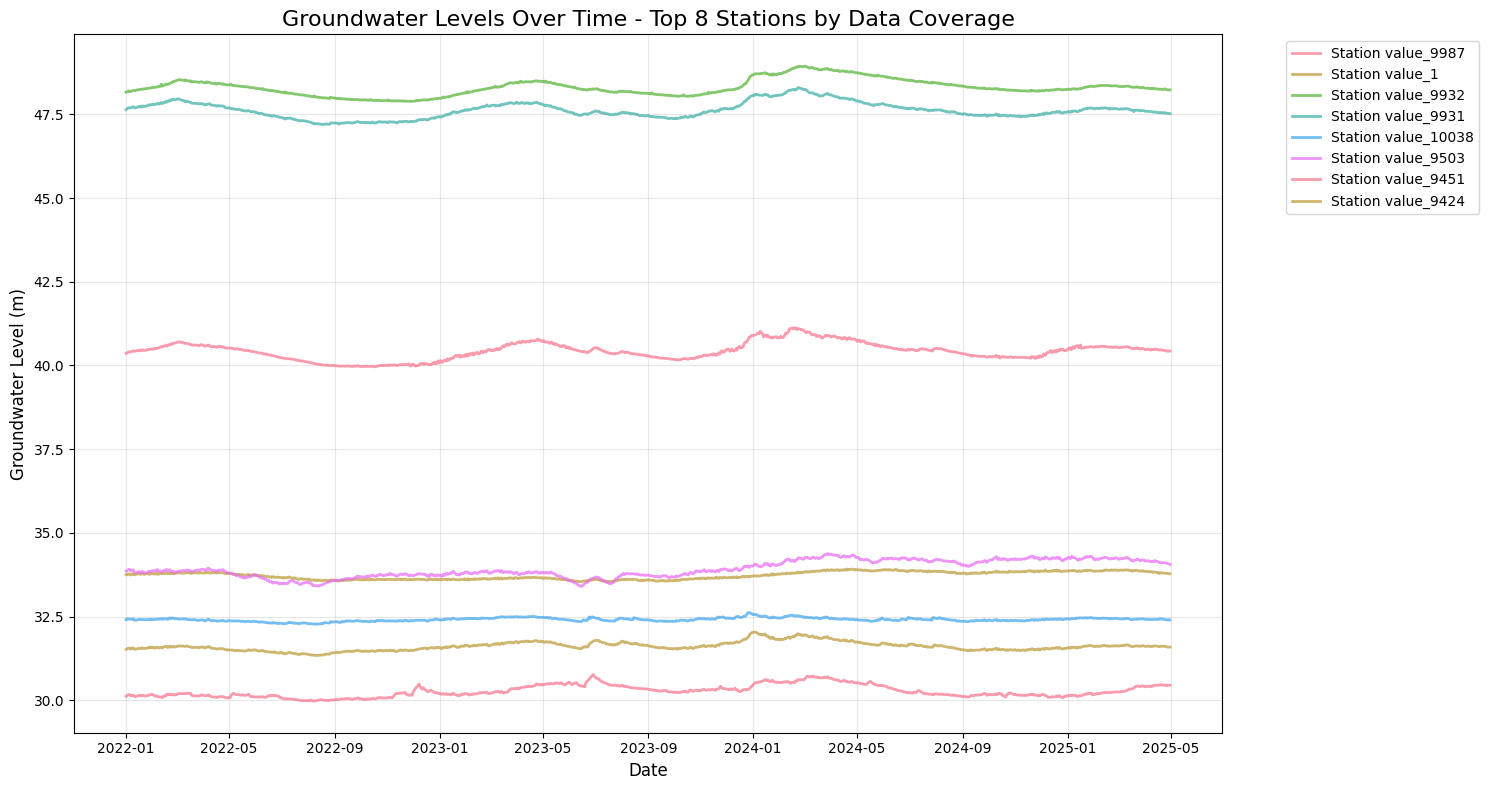


Data points per station:
  value_9987: 1216 measurements
  value_1: 1216 measurements
  value_9932: 1216 measurements
  value_9931: 1216 measurements
  value_10038: 1216 measurements
  value_9503: 1216 measurements
  value_9451: 1216 measurements
  value_9424: 1216 measurements


In [7]:
# Time Series Analysis - Select stations with good data coverage
top_stations = data_availability.head(8).index.tolist()

# Check if index is datetime, if not convert it
if not isinstance(measurements.index, pd.DatetimeIndex):
    print("Converting index to datetime...")
    measurements.index = pd.to_datetime(measurements.index)

print(f"Selected top stations: {top_stations}")
print(f"Date range: {measurements.index.min()} to {measurements.index.max()}")

# Create static matplotlib time series plot
plt.figure(figsize=(15, 8))
for i, station in enumerate(top_stations):
    station_data = measurements[station].dropna()
    if len(station_data) > 0:  # Only plot if there's data
        plt.plot(station_data.index,
                 station_data.values,
                 label=f'Station {station}',
                 alpha=0.7,
                 linewidth=2)

plt.title('Groundwater Levels Over Time - Top 8 Stations by Data Coverage',
          fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Groundwater Level (m)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show some basic statistics
print(f"\nData points per station:")
for station in top_stations:
    count = measurements[station].count()
    print(f"  {station}: {count} measurements")

In [22]:
# Import plotly for interactive maps
import plotly.express as px
import plotly.graph_objects as go
import os

# Geographic Distribution of Monitoring Stations
# Create mapping between station IDs and measurement columns
station_ids_from_measurements = [
    col.replace('value_', '') for col in measurements.columns
    if col.startswith('value_')
]
coords['ID_str'] = coords['ID'].astype(str)

# Filter coordinates for stations that have measurement data
coords_with_data = coords[coords['ID_str'].isin(
    station_ids_from_measurements)].copy()

# Calculate average groundwater level for each station
coords_with_data['avg_groundwater_level'] = coords_with_data['ID_str'].apply(
    lambda x: measurements[f'value_{x}'].mean()
    if f'value_{x}' in measurements.columns else np.nan)

# Calculate data availability percentage
coords_with_data['data_availability'] = coords_with_data['ID_str'].apply(
    lambda x: (measurements[f'value_{x}'].count() / len(measurements)) * 100
    if f'value_{x}' in measurements.columns else 0)

print(f"Stations with coordinate data: {len(coords_with_data)}")
print(
    f"Average groundwater level range: {coords_with_data['avg_groundwater_level'].min():.2f} to {coords_with_data['avg_groundwater_level'].max():.2f} m"
)
print(
    f"Data availability range: {coords_with_data['data_availability'].min():.1f}% to {coords_with_data['data_availability'].max():.1f}%"
)

# Interactive Plotly scattermap with Berlin background
fig = px.scatter_mapbox(
    coords_with_data,
    lat='lat',
    lon='lon',
    color='avg_groundwater_level',
    size='data_availability',
    hover_name='ID',
    hover_data={
        'avg_groundwater_level': ':.2f',
        'data_availability': ':.1f',
        'lat': ':.4f',
        'lon': ':.4f'
    },
    color_continuous_scale='viridis',
    size_max=5,
    zoom=10,
    title=
    'Geographic Distribution of Groundwater Monitoring Stations in Berlin<br><sub>Size = Data Availability %, Color = Avg. Groundwater Level</sub>',
    labels={
        'avg_groundwater_level': 'Avg. Groundwater Level (m)',
        'data_availability': 'Data Availability (%)'
    })

# Set map style and center on Berlin
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(
        center=dict(lat=52.5200, lon=13.4050),  # Berlin coordinates
        zoom=10),
    height=700,
    margin={
        "r": 10,
        "t": 60,
        "l": 10,
        "b": 10
    })

fig.show()

# Save the figure for later use in Streamlit
output_dir = '../src/fe/assets/'
os.makedirs(output_dir, exist_ok=True)
fig.write_html(os.path.join(output_dir, 'groundwater_stations_map.html'))
fig.write_json(os.path.join(output_dir, 'groundwater_stations_map.json'))

print(f"\nMap saved to:")
print(f"  HTML: {os.path.join(output_dir, 'groundwater_stations_map.html')}")
print(f"  JSON: {os.path.join(output_dir, 'groundwater_stations_map.json')}")

Stations with coordinate data: 892
Average groundwater level range: 24.91 to 60.68 m
Data availability range: 2.3% to 100.0%


C:\Users\kaebe\AppData\Local\Temp\ipykernel_2876\3100405464.py:37: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/




Map saved to:
  HTML: ../src/fe/assets/groundwater_stations_map.html
  JSON: ../src/fe/assets/groundwater_stations_map.json


In [ ]:
import plotly.io as pio

fig = pio.read_json('../src/fe/assets/precipitation_plot.json')
fig.show()

C:\Users\kaebe\AppData\Local\Temp\ipykernel_2876\3106400979.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(monthly_data, labels=month_labels)


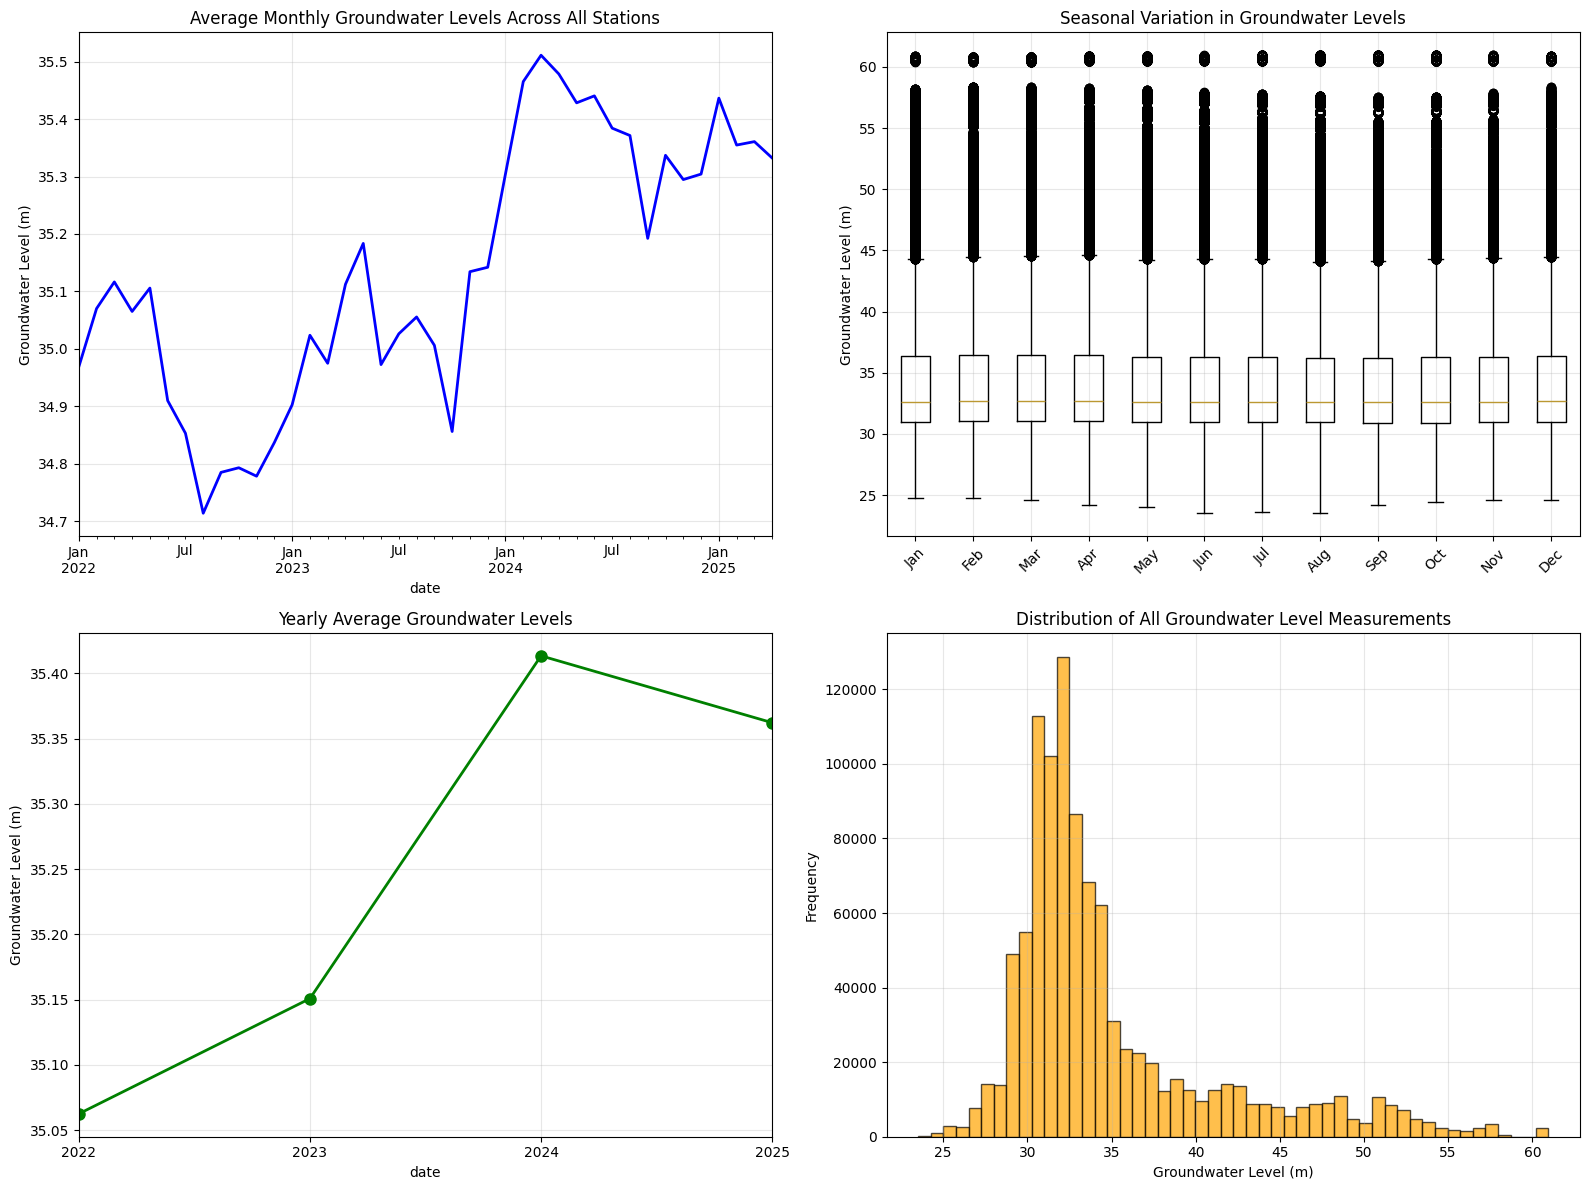

=== Seasonal Statistics ===
Highest groundwater levels: 3 (Month 3) - 35.34m
Lowest groundwater levels: 9 (Month 9) - 35.12m
Seasonal variation: 0.22m


In [9]:
# Seasonal Analysis
# Ensure datetime index
if not isinstance(measurements.index, pd.DatetimeIndex):
    measurements.index = pd.to_datetime(measurements.index)

# Calculate monthly averages across all stations (using 'ME' instead of deprecated 'M')
measurements_monthly = measurements.resample('ME').mean()
measurements_seasonal = measurements.groupby(measurements.index.month).mean()

# Create seasonal pattern visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Monthly trends
measurements_monthly.mean(axis=1).plot(ax=ax1, linewidth=2, color='blue')
ax1.set_title('Average Monthly Groundwater Levels Across All Stations')
ax1.set_ylabel('Groundwater Level (m)')
ax1.grid(True, alpha=0.3)

# Seasonal boxplot
monthly_data = []
month_labels = []
for month in range(1, 13):
    month_data = measurements[measurements.index.month ==
                              month].values.flatten()
    month_data = month_data[~np.isnan(month_data)]
    if len(month_data) > 0:  # Only add if there's data
        monthly_data.append(month_data)
        month_labels.append(datetime(2022, month, 1).strftime('%b'))

if monthly_data:  # Only create boxplot if we have data
    ax2.boxplot(monthly_data, labels=month_labels)
    ax2.set_title('Seasonal Variation in Groundwater Levels')
    ax2.set_ylabel('Groundwater Level (m)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)

# Yearly trends
yearly_avg = measurements.resample('YE').mean().mean(
    axis=1)  # Using 'YE' instead of 'Y'
if len(yearly_avg) > 0:
    yearly_avg.plot(ax=ax3,
                    marker='o',
                    linewidth=2,
                    markersize=8,
                    color='green')
    ax3.set_title('Yearly Average Groundwater Levels')
    ax3.set_ylabel('Groundwater Level (m)')
    ax3.grid(True, alpha=0.3)

# Distribution of all measurements
all_measurements = measurements.values.flatten()
all_measurements = all_measurements[~np.isnan(all_measurements)]
if len(all_measurements) > 0:
    ax4.hist(all_measurements,
             bins=50,
             alpha=0.7,
             color='orange',
             edgecolor='black')
    ax4.set_title('Distribution of All Groundwater Level Measurements')
    ax4.set_xlabel('Groundwater Level (m)')
    ax4.set_ylabel('Frequency')
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print seasonal statistics
print("=== Seasonal Statistics ===")
seasonal_stats = measurements_seasonal.mean(axis=1)
if len(seasonal_stats) > 0:
    print(
        f"Highest groundwater levels: {seasonal_stats.idxmax()} (Month {seasonal_stats.idxmax()}) - {seasonal_stats.max():.2f}m"
    )
    print(
        f"Lowest groundwater levels: {seasonal_stats.idxmin()} (Month {seasonal_stats.idxmin()}) - {seasonal_stats.min():.2f}m"
    )
    print(
        f"Seasonal variation: {seasonal_stats.max() - seasonal_stats.min():.2f}m"
    )
else:
    print("No seasonal data available")

Analyzing correlations for 20 stations with >100 measurements


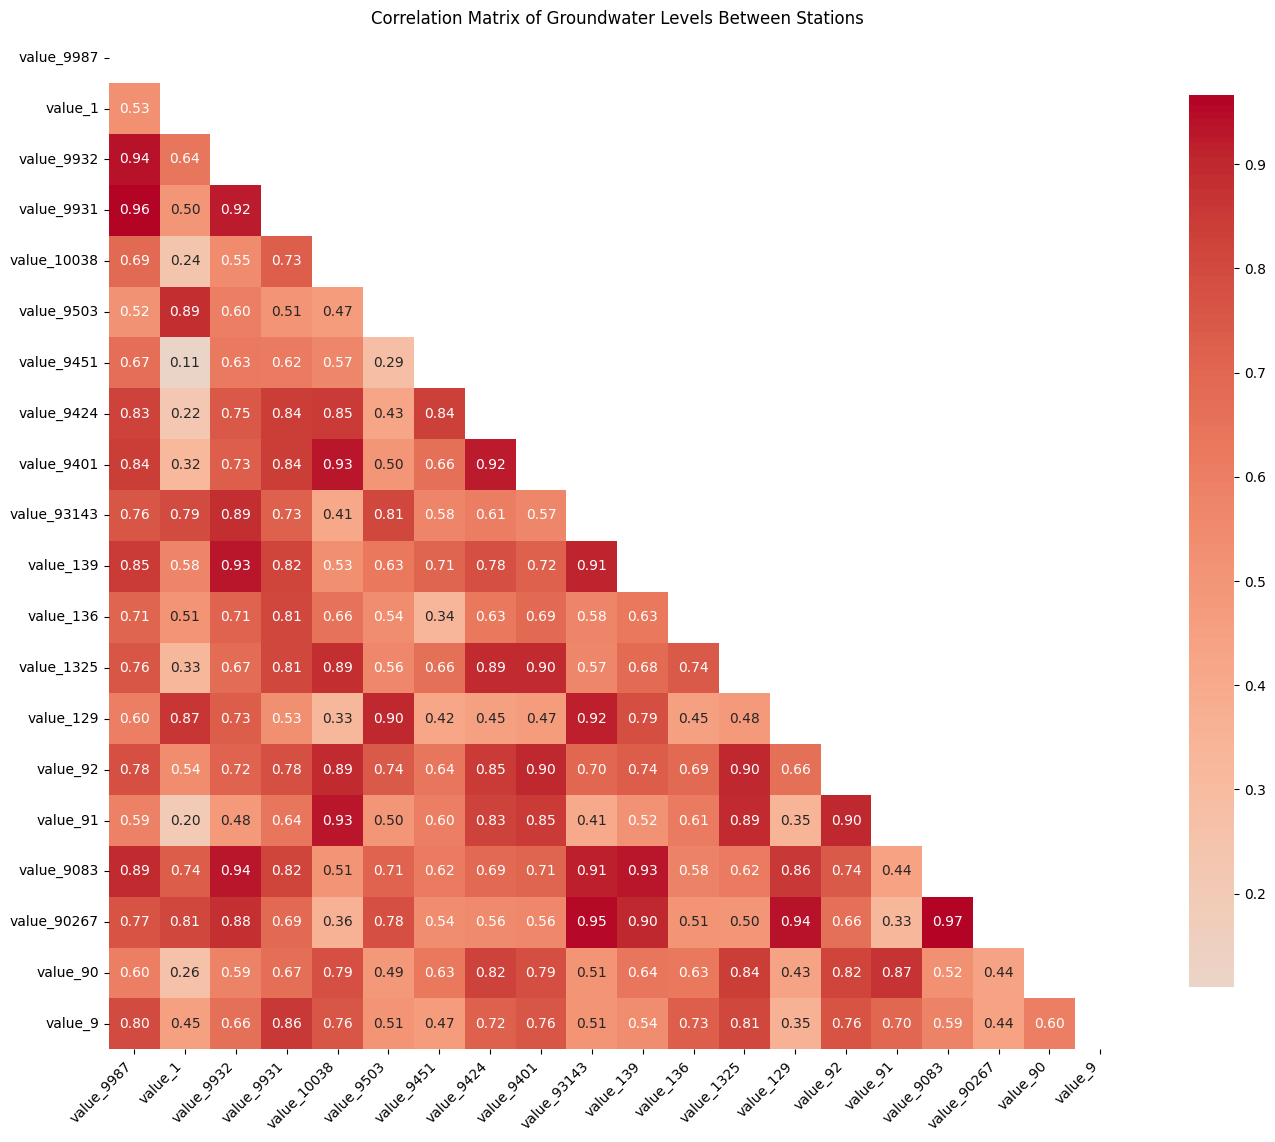

=== Highly Correlated Station Pairs (|r| > 0.8) ===
Stations value_9083 & value_90267: r = 0.967
Stations value_9987 & value_9931: r = 0.960
Stations value_93143 & value_90267: r = 0.951
Stations value_129 & value_90267: r = 0.939
Stations value_9987 & value_9932: r = 0.939
Stations value_9932 & value_9083: r = 0.936
Stations value_9932 & value_139: r = 0.933
Stations value_10038 & value_91: r = 0.932
Stations value_10038 & value_9401: r = 0.932
Stations value_139 & value_9083: r = 0.927

=== Correlation Summary ===
Average correlation: 0.665
Max correlation: 0.967
Min correlation: 0.110
Pairs with high correlation (>0.8): 53
Pairs with moderate correlation (0.5-0.8): 104


In [10]:
# Correlation Analysis Between Stations
# Calculate correlation matrix for stations with sufficient data
stations_with_enough_data = data_availability[
    data_availability > 100].index[:20]  # Top 20 stations with most data

print(
    f"Analyzing correlations for {len(stations_with_enough_data)} stations with >100 measurements"
)

correlation_matrix = measurements[stations_with_enough_data].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Groundwater Levels Between Stations')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Find highly correlated station pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.8 and not np.isnan(
                corr_val):  # High correlation threshold
            high_corr_pairs.append((correlation_matrix.columns[i],
                                    correlation_matrix.columns[j], corr_val))

print("=== Highly Correlated Station Pairs (|r| > 0.8) ===")
if high_corr_pairs:
    for station1, station2, corr in sorted(high_corr_pairs,
                                           key=lambda x: abs(x[2]),
                                           reverse=True)[:10]:
        print(f"Stations {station1} & {station2}: r = {corr:.3f}")
else:
    print("No station pairs found with correlation > 0.8")

# Summary statistics
print(f"\n=== Correlation Summary ===")
print(f"Average correlation: {correlation_matrix.values[~mask].mean():.3f}")
print(f"Max correlation: {correlation_matrix.values[~mask].max():.3f}")
print(f"Min correlation: {correlation_matrix.values[~mask].min():.3f}")
print(f"Pairs with high correlation (>0.8): {len(high_corr_pairs)}")
print(
    f"Pairs with moderate correlation (0.5-0.8): {sum(1 for i in range(len(correlation_matrix.columns)) for j in range(i + 1, len(correlation_matrix.columns)) if 0.5 < abs(correlation_matrix.iloc[i, j]) <= 0.8 and not np.isnan(correlation_matrix.iloc[i, j]))}"
)

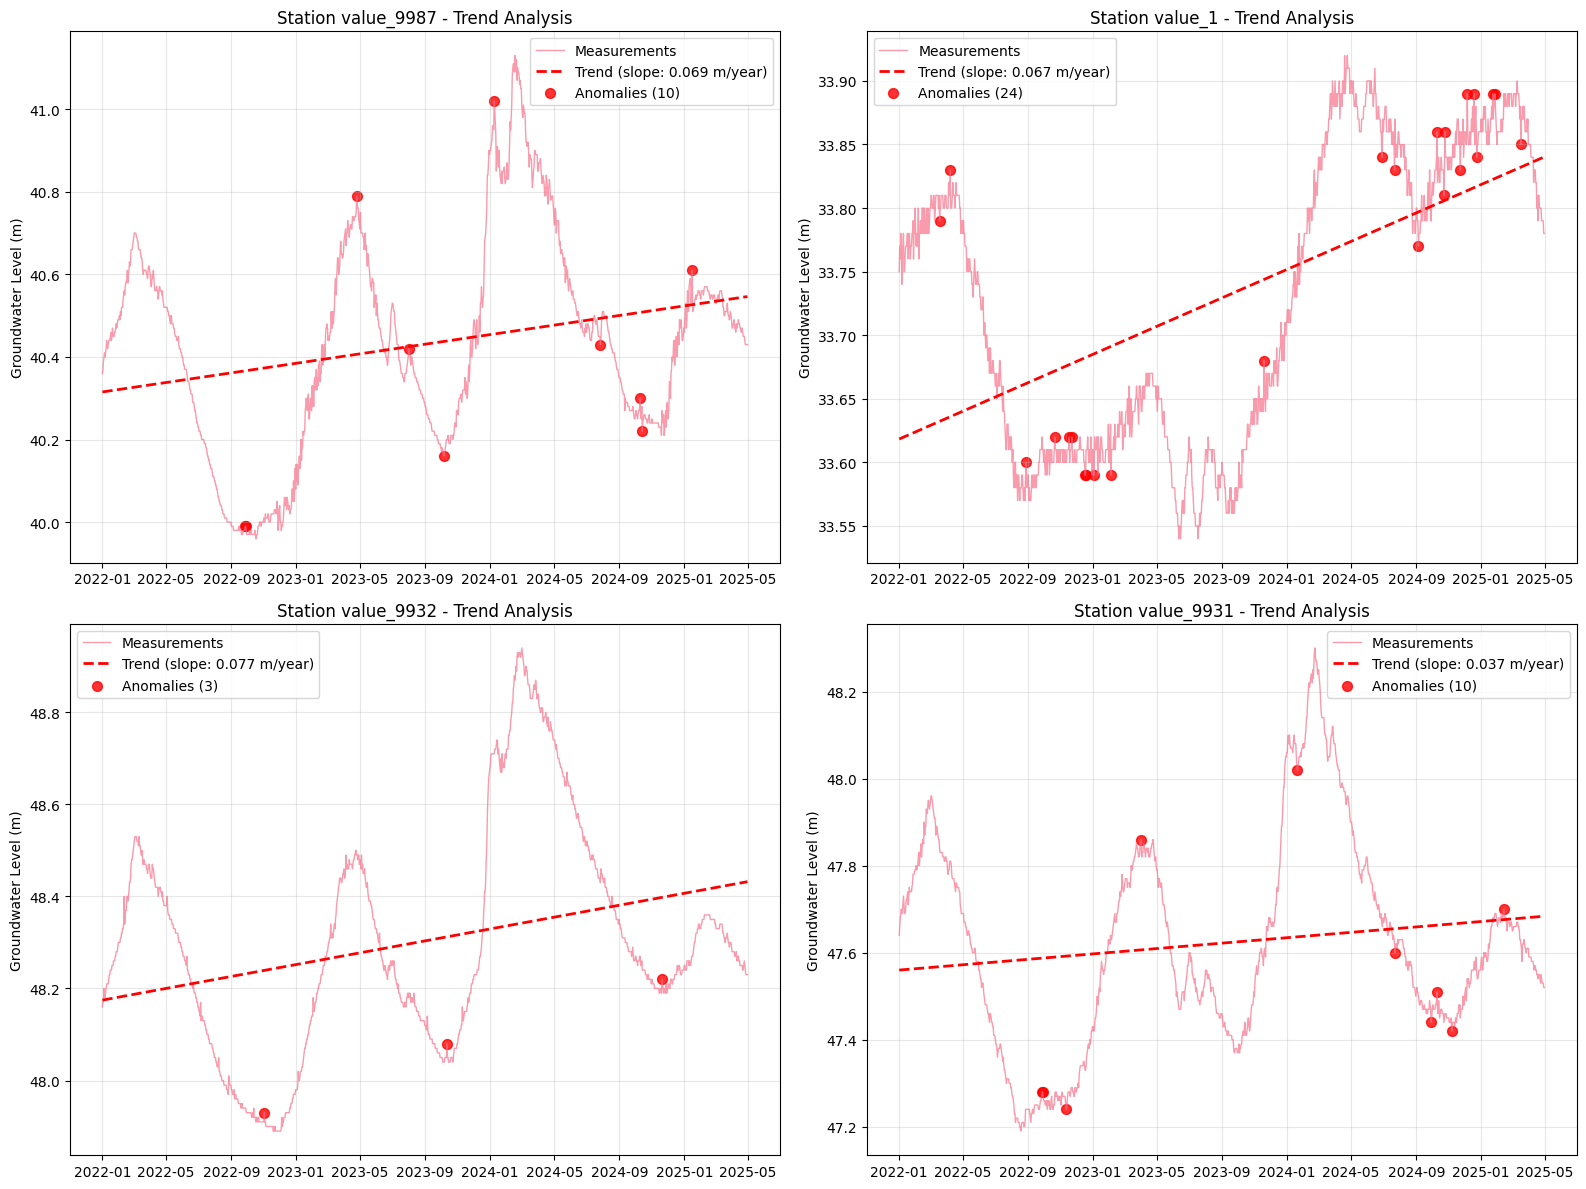

=== Trend Analysis Summary ===


,Station,Slope_m_per_day,Slope_m_per_year,R_squared,P_value,Anomalies
0,value_9987,0.000190,0.069394,0.068780,1.416112e-20,10
1,value_1,0.000183,0.066659,0.315504,4.779948e-102,24
2,value_9932,0.000212,0.077317,0.092954,1.422987e-27,3
3,value_9931,0.000102,0.037158,0.022900,1.144552e-07,10



=== Overall Network Trend ===
Average trend across all stations: 0.1892 m/year
R-squared: 0.6109
P-value: 0.0000


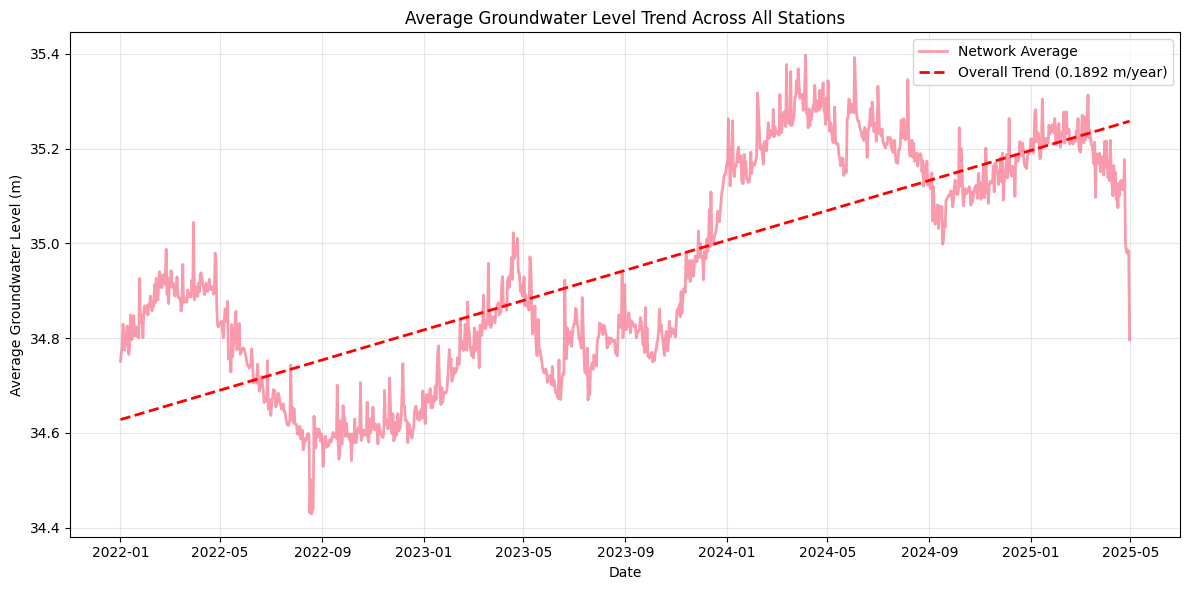

In [11]:
# Trend Analysis and Anomaly Detection
from scipy import stats

# Select a few representative stations for detailed analysis
selected_stations = top_stations[:4]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

trends_summary = []

for i, station in enumerate(selected_stations):
    station_data = measurements[station].dropna()

    # Calculate linear trend
    x = np.arange(len(station_data))
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        x, station_data.values)

    # Plot time series with trend line
    axes[i].plot(station_data.index,
                 station_data.values,
                 alpha=0.7,
                 label='Measurements',
                 linewidth=1)

    # Add trend line
    trend_line = slope * x + intercept
    axes[i].plot(station_data.index,
                 trend_line,
                 'r--',
                 linewidth=2,
                 label=f'Trend (slope: {slope*365:.3f} m/year)')

    # Detect anomalies (values beyond 2 standard deviations)
    rolling_mean = station_data.rolling(window=30, center=True).mean()
    rolling_std = station_data.rolling(window=30, center=True).std()
    anomalies = station_data[(station_data > rolling_mean + 2 * rolling_std) |
                             (station_data < rolling_mean - 2 * rolling_std)]

    if len(anomalies) > 0:
        axes[i].scatter(anomalies.index,
                        anomalies.values,
                        color='red',
                        s=50,
                        alpha=0.8,
                        label=f'Anomalies ({len(anomalies)})')

    axes[i].set_title(f'Station {station} - Trend Analysis')
    axes[i].set_ylabel('Groundwater Level (m)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

    trends_summary.append({
        'Station': station,
        'Slope_m_per_day': slope,
        'Slope_m_per_year': slope * 365,
        'R_squared': r_value**2,
        'P_value': p_value,
        'Anomalies': len(anomalies)
    })

plt.tight_layout()
plt.show()

# Display trends summary
trends_df = pd.DataFrame(trends_summary)
print("=== Trend Analysis Summary ===")
display(trends_df)

# Overall trend across all stations
overall_avg = measurements.mean(axis=1).dropna()
x_overall = np.arange(len(overall_avg))
slope_overall, intercept_overall, r_value_overall, p_value_overall, std_err_overall = stats.linregress(
    x_overall, overall_avg.values)

print(f"\n=== Overall Network Trend ===")
print(f"Average trend across all stations: {slope_overall*365:.4f} m/year")
print(f"R-squared: {r_value_overall**2:.4f}")
print(f"P-value: {p_value_overall:.4f}")

# Plot overall trend
plt.figure(figsize=(12, 6))
plt.plot(overall_avg.index,
         overall_avg.values,
         alpha=0.7,
         linewidth=2,
         label='Network Average')
trend_line_overall = slope_overall * x_overall + intercept_overall
plt.plot(overall_avg.index,
         trend_line_overall,
         'r--',
         linewidth=2,
         label=f'Overall Trend ({slope_overall*365:.4f} m/year)')
plt.title('Average Groundwater Level Trend Across All Stations')
plt.xlabel('Date')
plt.ylabel('Average Groundwater Level (m)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Data Quality Assessment

Let's analyze the quality and completeness of our groundwater monitoring data.

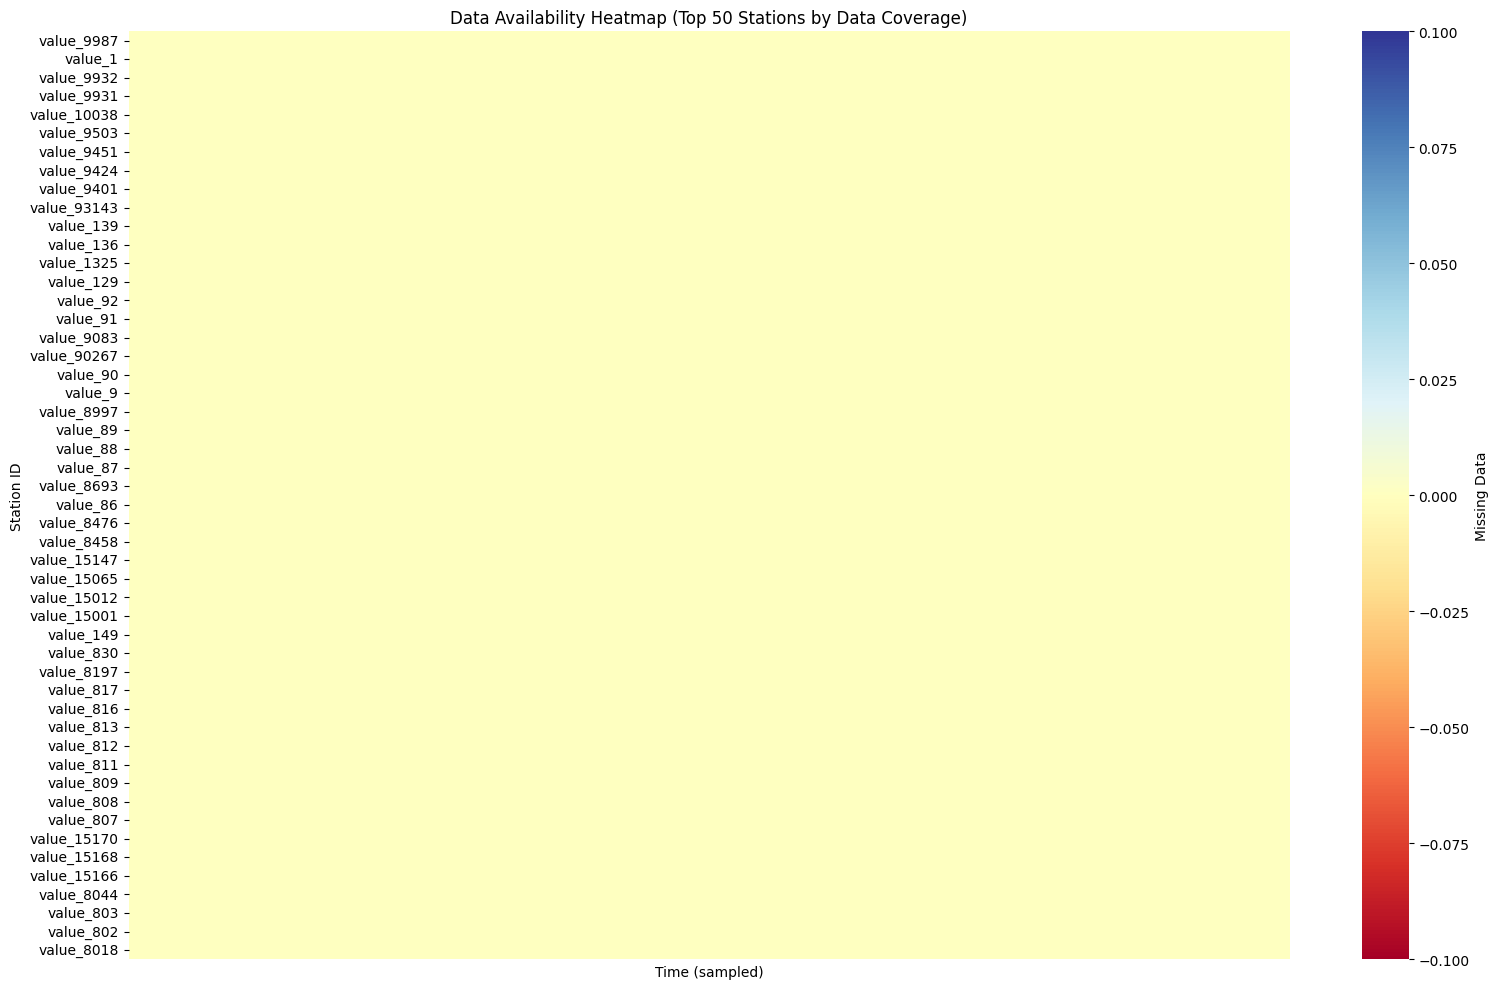

Calculating data gaps...
  Processing station 1/892
  Processing station 101/892
  Processing station 201/892
  Processing station 301/892
  Processing station 401/892
  Processing station 501/892
  Processing station 601/892
  Processing station 701/892
  Processing station 801/892


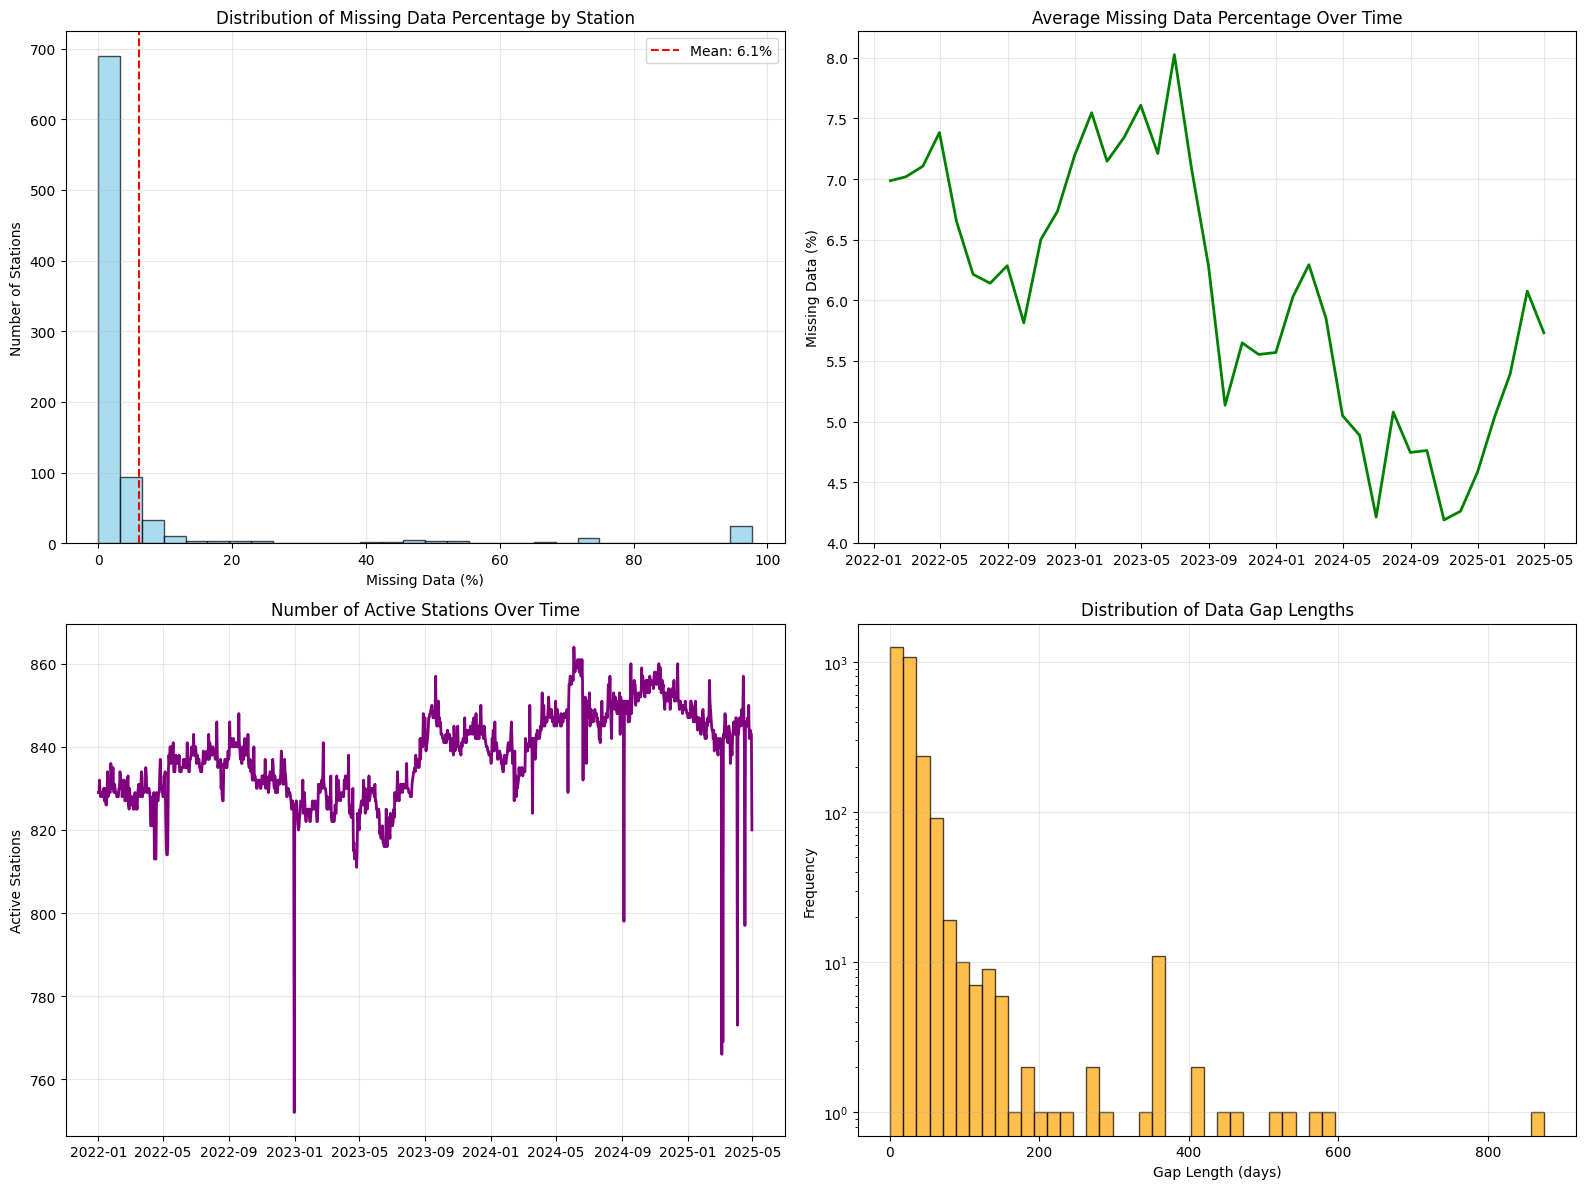

=== Data Quality Summary ===
Total number of stations: 892
Date range: 2022-01-01 to 2025-04-30
Total data points: 1,084,672
Missing data points: 65,703 (6.06%)
Stations with >80% data coverage: 835
Stations with >50% data coverage: 852
Average data coverage per station: 93.9%
Average gap length: 24.1 days
Maximum gap length: 875 days
Total gaps identified: 2731
Most reliable station: value_1 (100.0% coverage)
Least reliable station: value_4727 (2.3% coverage)


In [12]:
# Data Quality Assessment
# Ensure datetime index
if not isinstance(measurements.index, pd.DatetimeIndex):
    measurements.index = pd.to_datetime(measurements.index)

# Calculate missing data patterns
missing_data = measurements.isnull()
missing_percentage = (missing_data.sum() / len(measurements)) * 100

# Create data availability heatmap
plt.figure(figsize=(16, 10))

# Sample every 30th day for visualization if dataset is large
sample_freq = max(1,
                  len(measurements) //
                  1000)  # Sample to show ~1000 time points
sampled_missing = missing_data.iloc[::sample_freq, :]

# Select subset of stations for visualization
n_stations_to_show = min(50, len(measurements.columns))
stations_to_show = data_availability.head(n_stations_to_show).index

sns.heatmap(sampled_missing[stations_to_show].T,
            cmap='RdYlBu',
            cbar_kws={'label': 'Missing Data'},
            yticklabels=True,
            xticklabels=False)
plt.title('Data Availability Heatmap (Top 50 Stations by Data Coverage)')
plt.xlabel('Time (sampled)')
plt.ylabel('Station ID')
plt.tight_layout()
plt.show()

# Data availability statistics
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Missing data percentage distribution
ax1.hist(missing_percentage,
         bins=30,
         alpha=0.7,
         color='skyblue',
         edgecolor='black')
ax1.set_title('Distribution of Missing Data Percentage by Station')
ax1.set_xlabel('Missing Data (%)')
ax1.set_ylabel('Number of Stations')
ax1.axvline(missing_percentage.mean(),
            color='red',
            linestyle='--',
            label=f'Mean: {missing_percentage.mean():.1f}%')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Data availability over time (using 'ME' instead of deprecated 'M')
try:
    monthly_availability = missing_data.resample('ME').mean() * 100
    monthly_availability_avg = monthly_availability.mean(axis=1)
    ax2.plot(monthly_availability_avg.index,
             monthly_availability_avg.values,
             linewidth=2,
             color='green')
    ax2.set_title('Average Missing Data Percentage Over Time')
    ax2.set_ylabel('Missing Data (%)')
    ax2.grid(True, alpha=0.3)
except Exception as e:
    ax2.text(0.5,
             0.5,
             f'Error creating monthly plot:\n{str(e)}',
             transform=ax2.transAxes,
             ha='center',
             va='center')
    ax2.set_title('Monthly Data Availability (Error)')

# Number of active stations over time
active_stations = (~missing_data).sum(axis=1)
ax3.plot(active_stations.index,
         active_stations.values,
         linewidth=2,
         color='purple')
ax3.set_title('Number of Active Stations Over Time')
ax3.set_ylabel('Active Stations')
ax3.grid(True, alpha=0.3)

# Gap analysis - consecutive missing days
gap_lengths = []
print("Calculating data gaps...")
for i, station in enumerate(measurements.columns):
    if i % 100 == 0:  # Progress indicator
        print(f"  Processing station {i+1}/{len(measurements.columns)}")

    station_missing = missing_data[station]
    gaps = []
    current_gap = 0
    for is_missing in station_missing:
        if is_missing:
            current_gap += 1
        else:
            if current_gap > 0:
                gaps.append(current_gap)
            current_gap = 0
    if current_gap > 0:
        gaps.append(current_gap)
    gap_lengths.extend(gaps)

if gap_lengths:
    ax4.hist(gap_lengths,
             bins=min(50,
                      max(gap_lengths) // 5),
             alpha=0.7,
             color='orange',
             edgecolor='black')
    ax4.set_title('Distribution of Data Gap Lengths')
    ax4.set_xlabel('Gap Length (days)')
    ax4.set_ylabel('Frequency')
    ax4.set_yscale('log')
    ax4.grid(True, alpha=0.3)
else:
    ax4.text(0.5,
             0.5,
             'No gaps found',
             transform=ax4.transAxes,
             ha='center',
             va='center')
    ax4.set_title('Data Gap Distribution')

plt.tight_layout()
plt.show()

# Data quality summary
print("=== Data Quality Summary ===")
print(f"Total number of stations: {len(measurements.columns)}")
print(
    f"Date range: {measurements.index.min().strftime('%Y-%m-%d')} to {measurements.index.max().strftime('%Y-%m-%d')}"
)
print(f"Total data points: {measurements.size:,}")
print(
    f"Missing data points: {missing_data.sum().sum():,} ({(missing_data.sum().sum()/measurements.size)*100:.2f}%)"
)
print(f"Stations with >80% data coverage: {sum(missing_percentage < 20)}")
print(f"Stations with >50% data coverage: {sum(missing_percentage < 50)}")
print(
    f"Average data coverage per station: {100-missing_percentage.mean():.1f}%")
if gap_lengths:
    print(f"Average gap length: {np.mean(gap_lengths):.1f} days")
    print(f"Maximum gap length: {max(gap_lengths)} days")
    print(f"Total gaps identified: {len(gap_lengths)}")
print(
    f"Most reliable station: {missing_percentage.idxmin()} ({100-missing_percentage.min():.1f}% coverage)"
)
print(
    f"Least reliable station: {missing_percentage.idxmax()} ({100-missing_percentage.max():.1f}% coverage)"
)

## Summary and Key Insights

This notebook provides a comprehensive analysis of Berlin's groundwater monitoring data. Key findings and insights from our exploration:

In [13]:
# Generate comprehensive summary
print("=" * 60)
print("BERLIN GROUNDWATER MONITORING ANALYSIS - SUMMARY REPORT")
print("=" * 60)

# Ensure datetime index for proper date handling
if not isinstance(measurements.index, pd.DatetimeIndex):
    measurements.index = pd.to_datetime(measurements.index)

# Dataset overview
print(f"\n📊 DATASET OVERVIEW")
print(
    f"   • Time period: {measurements.index.min().strftime('%Y-%m-%d')} to {measurements.index.max().strftime('%Y-%m-%d')}"
)
print(
    f"   • Duration: {(measurements.index.max() - measurements.index.min()).days} days"
)
print(f"   • Number of monitoring stations: {len(measurements.columns)}")
print(f"   • Total measurements: {measurements.size:,}")
print(
    f"   • Data completeness: {((1 - missing_data.sum().sum()/measurements.size)*100):.1f}%"
)

# Groundwater level insights
overall_min = measurements.min().min()
overall_max = measurements.max().max()
overall_mean = measurements.mean().mean()

print(f"\n💧 GROUNDWATER LEVEL INSIGHTS")
print(f"   • Range: {overall_min:.2f}m to {overall_max:.2f}m")
print(f"   • Network average: {overall_mean:.2f}m")

# Check if seasonal_stats exists
if 'seasonal_stats' in locals():
    print(
        f"   • Seasonal variation: {seasonal_stats.max() - seasonal_stats.min():.2f}m"
    )
else:
    print("   • Seasonal variation: Not calculated")

# Check if slope_overall exists
if 'slope_overall' in locals():
    print(f"   • Overall trend: {slope_overall*365:.4f} m/year")
else:
    print("   • Overall trend: Not calculated")

# Station insights
best_station = missing_percentage.idxmin()

print(f"\n📍 STATION INSIGHTS")
print(
    f"   • Most reliable station: {best_station} ({100-missing_percentage.min():.1f}% coverage)"
)

# Check if coords_with_data exists
if 'coords_with_data' in locals() and len(coords_with_data) > 0:
    print(
        f"   • Geographic spread: {coords_with_data['lon'].max()-coords_with_data['lon'].min():.3f}° longitude, {coords_with_data['lat'].max()-coords_with_data['lat'].min():.3f}° latitude"
    )
else:
    print("   • Geographic spread: Not calculated")

print(
    f"   • Stations with >80% coverage: {sum(missing_percentage < 20)}/{len(measurements.columns)}"
)

# Temporal patterns
print(f"\n📅 TEMPORAL PATTERNS")
if 'seasonal_stats' in locals():
    print(
        f"   • Highest levels typically in: Month {seasonal_stats.idxmax()} - {seasonal_stats.max():.2f}m"
    )
    print(
        f"   • Lowest levels typically in: Month {seasonal_stats.idxmin()} - {seasonal_stats.min():.2f}m"
    )
else:
    print("   • Seasonal patterns: Not calculated")

if 'active_stations' in locals():
    print(
        f"   • Most active monitoring period: {active_stations.idxmax().strftime('%Y-%m')} ({active_stations.max()} stations)"
    )
else:
    print("   • Active monitoring patterns: Not calculated")

# Data quality
if 'gap_lengths' in locals() and gap_lengths:
    print(f"\n🔍 DATA QUALITY")
    print(f"   • Average gap length: {np.mean(gap_lengths):.1f} days")
    print(f"   • Longest gap: {max(gap_lengths)} days")
    print(f"   • Total gaps identified: {len(gap_lengths)}")
else:
    print(f"\n🔍 DATA QUALITY")
    print("   • Gap analysis: Not completed")

print(f"\n🎯 RECOMMENDATIONS FOR FLOOD PREDICTION")
print(f"   • Focus on stations with >80% coverage for reliable modeling")
print(f"   • Consider seasonal patterns in prediction algorithms")
print(f"   • Monitor stations with high correlation for redundancy")
print(f"   • Account for data gaps in model training")
print(
    f"   • Prioritize stations with geographic diversity for spatial coverage")

print(f"\n" + "=" * 60)

BERLIN GROUNDWATER MONITORING ANALYSIS - SUMMARY REPORT

📊 DATASET OVERVIEW
   • Time period: 2022-01-01 to 2025-04-30
   • Duration: 1215 days
   • Number of monitoring stations: 892
   • Total measurements: 1,084,672
   • Data completeness: 93.9%

💧 GROUNDWATER LEVEL INSIGHTS
   • Range: 23.51m to 60.96m
   • Network average: 35.24m
   • Seasonal variation: 0.22m
   • Overall trend: 0.1892 m/year

📍 STATION INSIGHTS
   • Most reliable station: value_1 (100.0% coverage)
   • Geographic spread: 0.662° longitude, 0.326° latitude
   • Stations with >80% coverage: 835/892

📅 TEMPORAL PATTERNS
   • Highest levels typically in: Month 3 - 35.34m
   • Lowest levels typically in: Month 9 - 35.12m
   • Most active monitoring period: 2024-06 (864 stations)

🔍 DATA QUALITY
   • Average gap length: 24.1 days
   • Longest gap: 875 days
   • Total gaps identified: 2731

🎯 RECOMMENDATIONS FOR FLOOD PREDICTION
   • Focus on stations with >80% coverage for reliable modeling
   • Consider seasonal patte

In [14]:
# Extract station IDs from measurement column names (remove 'value_' prefix)
station_ids_from_measurements = [
    col.replace('value_', '') for col in measurements.columns
    if col.startswith('value_')
]
coords['ID_str'] = coords['ID'].astype(str)

# Check overlap
overlap = set(coords['ID_str']).intersection(
    set(station_ids_from_measurements))
print(
    f"Station overlap: {len(overlap)}/{len(measurements.columns)} stations have coordinates"
)
print("Sample overlapping stations:", list(overlap)[:5])

# Create mapping for easy access
station_id_to_column = {
    station_id: f'value_{station_id}'
    for station_id in station_ids_from_measurements
}
print(f"Total measurement columns: {len(measurements.columns)}")
print(f"Stations with coordinates: {len(overlap)}")

Station overlap: 892/892 stations have coordinates
Sample overlapping stations: ['2', '5168', '1320', '609', '7042']
Total measurement columns: 892
Stations with coordinates: 892
